In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
lifesytle = pd.read_csv("lifetyle.csv")
lifesytle.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [ ]:
lifesytle_cleaned = lifesytle.rename(columns={
    'FAVC': 'high_calorie_intake',
    'FCVC': 'Veggie_intake',
    'NCP' : 'no_meals',
    'CAEC' : 'snacking',
    'SMOKE' : 'smoker',
    'CH2O' : 'water_intake',
    'SCC' : 'calorie_monitoring',
    'FAF' : 'physical_activity',
    'TUE' : 'screen_time',
    'CALC' : 'alcohol',
    'MTRANS': 'transport',
    'NObeyesdad': 'obesity_level'
})

In [ ]:
lifesytle_cleaned['family_history_with_overweight'] = lifesytle_cleaned['family_history_with_overweight'].map({'yes': 1, 'no': 0})

In [ ]:
lifesytle_cleaned['Gender'] = lifesytle_cleaned['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
lifesytle_cleaned['high_calorie_intake'] = lifesytle_cleaned['high_calorie_intake'].map({'yes': 1, 'no': 0})

In [ ]:
lifesytle_cleaned['snacking'] = lifesytle_cleaned['snacking'].map({'Always': 3, 'Sometimes': 2, 'Frequently': 1, 'no': 0})

In [ ]:
# Step 1: Standardize values
lifesytle_cleaned['smoker'] = (
    lifesytle_cleaned['smoker']
    .astype(str)
    .str.strip()
    .str.lower()
)

# Step 2: Flexible mapping (catches common variants)
mapping = {
    'yes': 1, 'y': 1, '1': 1, 'true': 1,
    'no': 0, 'n': 0, '0': 0, 'false': 0
}

lifesytle_cleaned['smoker'] = (
    lifesytle_cleaned['smoker']
    .map(mapping)
    .fillna(-1)  # Assign -1 to unmapped values (optional)
)

# Verify
print(lifesytle_cleaned['smoker'].value_counts())

smoker
0    2067
1      44
Name: count, dtype: int64


In [ ]:
mapping = {
    'yes': 1, 'y': 1, '1': 1,
    'no': 0, 'n': 0, '0': 0
}
lifesytle_cleaned['calorie_monitoring'] = (
    lifesytle_cleaned['calorie_monitoring']
    .astype(str).str.lower().str.strip()
    .map(mapping)
    .fillna(-1)
)

In [ ]:
lifesytle_cleaned['alcohol'] = lifesytle_cleaned['alcohol'].map({
    'Always': 3,
    'Sometimes': 2,
    'Frequently': 1,
    'no': 0
})

In [ ]:
distinct_values = lifesytle['CALC'].unique()
distinct_values

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [ ]:
lifesytle_cleaned['transport'] = lifesytle_cleaned['transport'].map({'Public_Transportation': 1, 'Walking': 2, 'Automobile': 3,'Motorbike': 4 , 'Bike': 5})

In [ ]:
lifesytle_cleaned['obesity_level'] = lifesytle_cleaned['obesity_level'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 0,
    'Overweight_Level_I': 1,
    'Overweight_Level_II': 1,
    'Obesity_Type_I': 1,
    'Obesity_Type_II': 1,
    'Obesity_Type_III': 1
})

In [ ]:
lifesytle_cleaned

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,2,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,1,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,1,1


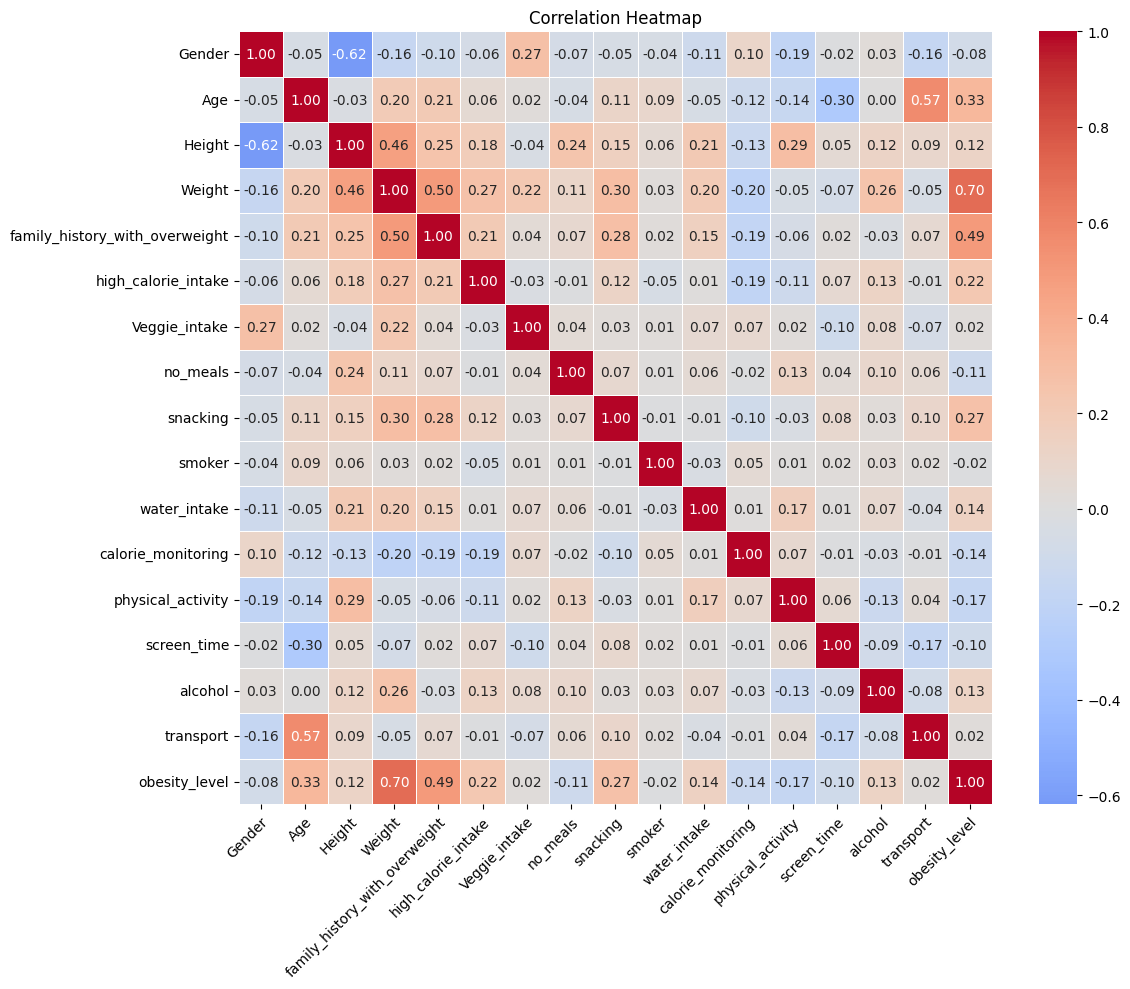

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = lifesytle_cleaned.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)

# Fix misaligned x-axis labels
heatmap.set_xticklabels(
    heatmap.get_xticklabels(),
    rotation=45,          # Rotate labels 45 degrees
    ha='right',           # Horizontal alignment to right
    rotation_mode='anchor' # Anchor rotation to label position
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

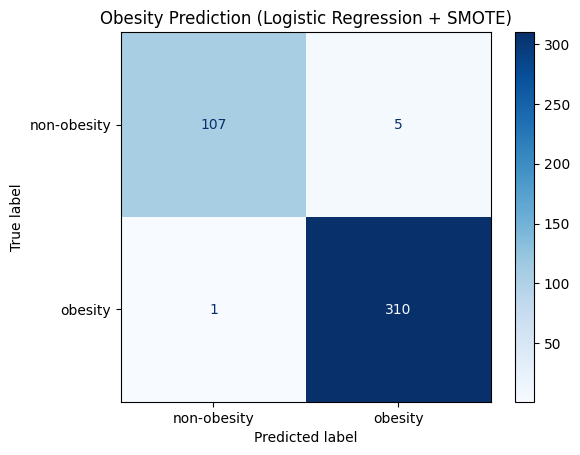

Classification Report:
               precision    recall  f1-score   support

 non-obesity       0.99      0.96      0.97       112
     obesity       0.98      1.00      0.99       311

    accuracy                           0.99       423
   macro avg       0.99      0.98      0.98       423
weighted avg       0.99      0.99      0.99       423


Class distribution BEFORE SMOTE: obesity_level
obesity        1241
non-obesity     447
Name: count, dtype: int64
Class distribution AFTER SMOTE: obesity_level
obesity        1241
non-obesity    1241
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import matplotlib.pyplot as plt

# 1. Load and prepare data
X = lifesytle_cleaned.drop(columns=['obesity_level'])
y = lifesytle_cleaned['obesity_level'].map({0: 'non-obesity', 1: 'obesity'})  # Rename labels

# 2. Convert categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 6. Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)  # Train on resampled data

# 7. Generate predictions
y_pred = model.predict(X_test_scaled)

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['non-obesity', 'obesity'])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['non-obesity', 'obesity']
)
disp.plot(cmap='Blues', values_format='d')
plt.title('Obesity Prediction (Logistic Regression + SMOTE)')
plt.show()

# 9. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['non-obesity', 'obesity']))

# 10. (Optional) Compare class distribution before/after SMOTE
print("\nClass distribution BEFORE SMOTE:", pd.Series(y_train).value_counts())
print("Class distribution AFTER SMOTE:", pd.Series(y_train_resampled).value_counts())


Top Statistically Significant Features (p < 0.05):
               Feature  Coefficient   P_value
4               Weight    11.051126  0.000000
3               Height    -3.096026  0.000000
2                  Age     0.482613  0.009953
7        Veggie_intake    -0.301138  0.014397
12  calorie_monitoring     0.188327  0.017150
1               Gender     0.380434  0.022125
15             alcohol     0.277172  0.035138
10              smoker    -0.255644  0.041988


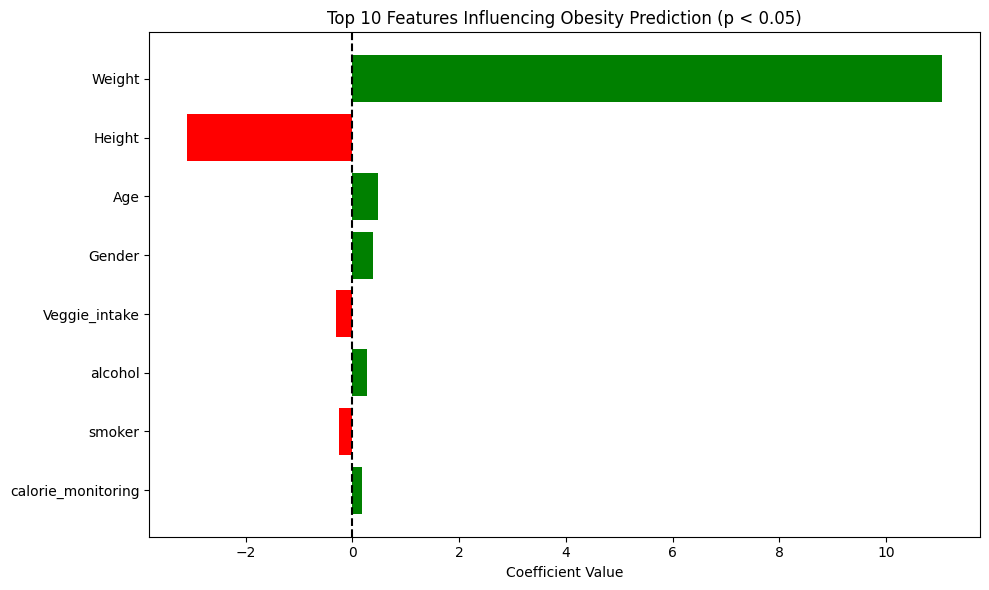

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats  # For calculating p-values

feature_names = X.columns.tolist()  # Ensure this matches your actual features

# Calculate p-values for logistic regression coefficients
def get_logit_pvalues(model, X):
    """Calculate p-values for logistic regression coefficients."""
    p = model.predict_proba(X)[:, 1]
    logit = np.log(p / (1 - p))
    denom = 2 * (1 + np.cosh(logit))
    denom = np.tile(denom, (X.shape[1], 1)).T
    F_ij = np.dot((X / denom).T, X)
    cov = np.linalg.inv(F_ij)
    sigma = np.sqrt(np.diag(cov))
    z = model.coef_[0] / sigma
    return 2 * (1 - stats.norm.cdf(np.abs(z)))

p_values = get_logit_pvalues(model, X_train_resampled)

importance_df = pd.DataFrame({
    'Feature': ['const'] + feature_names,
    'Coefficient': np.concatenate([[model.intercept_[0]], model.coef_[0]]),
    'P_value': np.concatenate([[np.nan], p_values])  # No p-value for intercept
})

top_significant = importance_df[
    (importance_df['P_value'] < 0.05) &
    (importance_df['Feature'] != 'const')
].sort_values('P_value', ascending=True)

print("\nTop Statistically Significant Features (p < 0.05):")
print(top_significant[['Feature', 'Coefficient', 'P_value']].head(10))

plt.figure(figsize=(10, 6))
top_coefs = top_significant.sort_values('Coefficient', key=abs, ascending=False).head(10)
plt.barh(top_coefs['Feature'], top_coefs['Coefficient'], color=['red' if x < 0 else 'green' for x in top_coefs['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Features Influencing Obesity Prediction (p < 0.05)')
plt.axvline(0, color='black', linestyle='--')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Age Class Distribution:
age_class
>21    1437
≤21     674
Name: count, dtype: int64


<ipython-input-147-6a73443b3ffc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=lifesytle_cleaned, x='age_class', palette="viridis")


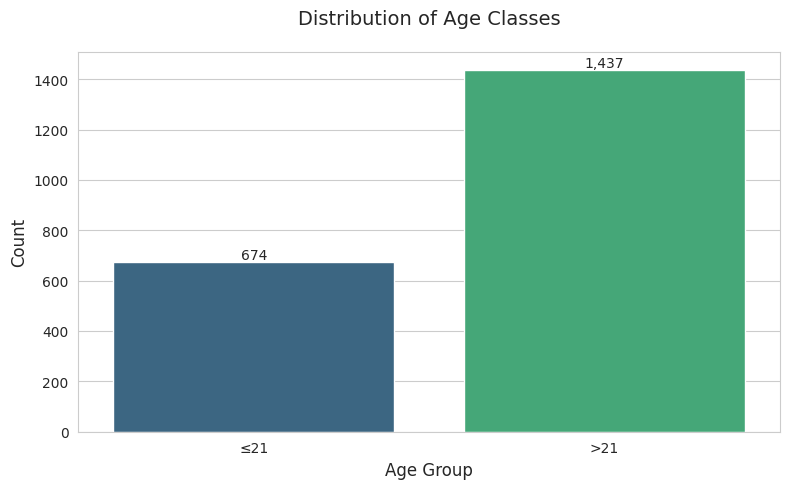

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create age_class column
lifesytle_cleaned['age_class'] = pd.cut(
    lifesytle_cleaned['Age'],
    bins=[0, 21, np.inf],  # Corrected bin edges
    labels=['≤21', '>21'],  # More descriptive labels
    right=False
)

# Verify the distribution
print("Age Class Distribution:")
print(lifesytle_cleaned['age_class'].value_counts(dropna=False))

# Visualize with improved styling
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.countplot(data=lifesytle_cleaned, x='age_class', palette="viridis")

# Add annotations and styling
plt.title('Distribution of Age Classes', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create the age_class column first (if not already done)
lifesytle_cleaned['age_class'] = pd.cut(
    lifesytle_cleaned['Age'],
    bins=[0, 21, np.inf],
    labels=['≤21', '>21'],
    right=False
)

# Create separate DataFrames
df_under21 = lifesytle_cleaned[lifesytle_cleaned['age_class'] == '≤21'].copy()
df_over21 = lifesytle_cleaned[lifesytle_cleaned['age_class'] == '>21'].copy()

# Verify the splits
print(f"≤21 DataFrame shape: {df_under21.shape}")
print(f">21 DataFrame shape: {df_over21.shape}")

# Optional: Verify age ranges
print("\nAge range verification:")
print("≤21 group age range:", df_under21['Age'].min(), "-", df_under21['Age'].max())
print(">21 group age range:", df_over21['Age'].min(), "-", df_over21['Age'].max())

# Optional: Save to separate files
df_under21.to_csv('under21_data.csv', index=False)
df_over21.to_csv('over21_data.csv', index=False)

≤21 DataFrame shape: (674, 19)
>21 DataFrame shape: (1437, 19)

Age range verification:
≤21 group age range: 14.0 - 20.993067
>21 group age range: 21.0 - 61.0


In [ ]:
adults_seniors_df = lifesytle_cleaned[
    lifesytle_cleaned['age_class'].isin(['Adults', 'Seniors'])
].copy()

adults_seniors_df

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level,age_group,age_class
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1,0,Youth (15-24),Adults
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1,0,Youth (15-24),Adults
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,1,0,Youth (15-24),Adults
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,2,1,Adults (25-64),Adults
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1,1,Youth (15-24),Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,1,21.285965,1.726920,131.335786,1,1,3.0,3.0,2,0,1.796267,0,1.728332,0.897924,2,1,1,Youth (15-24),Adults
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1,1,Youth (15-24),Adults
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1,1,Youth (15-24),Adults
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,1,1,Adults (25-64),Adults


In [ ]:
adults_df = lifesytle_cleaned[
    lifesytle_cleaned['age_class'].isin(['Adults'])
].copy()

adults_df

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level,age_group,age_class
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1,0,Youth (15-24),Adults
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1,0,Youth (15-24),Adults
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,1,0,Youth (15-24),Adults
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,2,1,Adults (25-64),Adults
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1,1,Youth (15-24),Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,1,21.285965,1.726920,131.335786,1,1,3.0,3.0,2,0,1.796267,0,1.728332,0.897924,2,1,1,Youth (15-24),Adults
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1,1,Youth (15-24),Adults
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1,1,Youth (15-24),Adults
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,1,1,Adults (25-64),Adults


In [ ]:
seniors_df = lifesytle_cleaned[
    lifesytle_cleaned['age_class'].isin(['Seniors'])
].copy()

seniors_df

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level,age_group,age_class
21,1,52.000000,1.690000,87.000000,1,1,3.000000,1.000000,2,1,2.000000,0,0.000000,0.0,0,3,1,Adults (25-64),Seniors
92,0,55.000000,1.780000,84.000000,1,0,3.000000,4.000000,1,0,3.000000,1,3.000000,0.0,1,2,1,Adults (25-64),Seniors
133,1,61.000000,1.650000,66.000000,0,1,3.000000,3.000000,3,0,2.000000,0,1.000000,1.0,1,1,0,Adults (25-64),Seniors
161,0,55.000000,1.650000,80.000000,0,1,2.000000,3.000000,2,0,2.000000,0,1.000000,0.0,0,3,1,Adults (25-64),Seniors
169,1,45.000000,1.630000,77.000000,1,1,2.000000,3.000000,1,0,1.000000,0,0.000000,0.0,0,3,1,Adults (25-64),Seniors
232,1,51.000000,1.590000,50.000000,1,0,3.000000,3.000000,2,1,3.000000,1,2.000000,0.0,0,1,0,Adults (25-64),Seniors
252,0,56.000000,1.790000,90.000000,1,0,2.000000,3.000000,2,1,2.000000,0,1.000000,0.0,1,3,1,Adults (25-64),Seniors
492,0,45.000000,1.700000,86.000000,0,1,3.000000,3.000000,1,0,1.000000,0,0.000000,0.0,0,3,1,Adults (25-64),Seniors
1013,0,55.246250,1.769269,80.491339,0,1,2.000000,3.000000,2,0,2.000000,0,1.000000,0.0,0,3,1,Adults (25-64),Seniors
1034,0,50.832559,1.745528,82.130728,1,1,2.000000,3.000000,2,0,1.774778,0,0.943266,0.0,0,3,1,Adults (25-64),Seniors


                           Feature  Coefficient
0   family_history_with_overweight     0.102644
1              high_calorie_intake    -0.091446
2                    Veggie_intake    -0.222243
3                         no_meals     0.001597
4                         snacking    -0.226140
5                           smoker     0.091446
6                     water_intake    -0.052872
8                physical_activity    -0.032905
9                      screen_time    -0.503885
10                         alcohol    -0.304607
11                       transport     0.503885


<Figure size 1000x600 with 0 Axes>

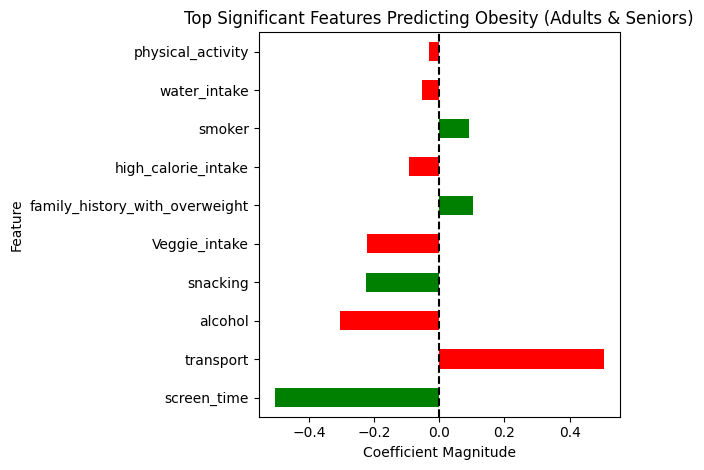

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare data (Adults & Seniors only)
X = seniors_df.drop(columns=['obesity_level', 'age_class', 'Gender', 'Age', 'Height', 'Weight'])  # Drop specified columns
y = seniors_df['obesity_level']  # Target (must be binary: 0/1 or 'non-obesity'/'obesity')

# 2. One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Check for NaN values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Data contains NaN values. Please handle them before proceeding.")
else:
    # 4. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 6. Fit logistic regression with regularization
    model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # 7. Extract coefficients and feature names
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_[0]
    })

    # 8. Print significant features
    print(importance_df[importance_df['Coefficient'] != 0])

    # 9. Visualize top features
    plt.figure(figsize=(10, 6))
    importance_df.sort_values('Coefficient', key=abs, ascending=False).head(10).plot.barh(
        x='Feature', y='Coefficient',
        color=importance_df['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green'),
        legend=False
    )
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel('Coefficient Magnitude')
    plt.title('Top Significant Features Predicting Obesity (Adults & Seniors)')
    plt.tight_layout()
    plt.show()


                           Feature  Coefficient
0   family_history_with_overweight     0.591020
1              high_calorie_intake     0.502864
2                    Veggie_intake    -0.267982
3                         no_meals    -0.312708
4                         snacking     0.433285
5                           smoker    -0.093434
6                     water_intake     0.327148
7               calorie_monitoring    -0.165883
8                physical_activity    -0.166990
9                      screen_time    -0.188223
10                         alcohol     0.368641
11                       transport     0.321959


<Figure size 1000x600 with 0 Axes>

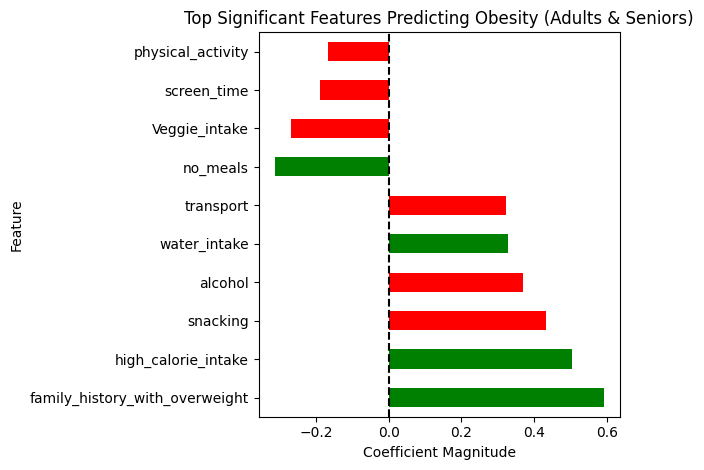

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare data (Adults & Seniors only)
X = adults_df.drop(columns=['obesity_level', 'age_group', 'age_class', 'Gender', 'Age', 'Height', 'Weight']) # Drop specified columns
y = adults_df['obesity_level']  # Target (must be binary: 0/1 or 'non-obesity'/'obesity')

# 2. One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Check for NaN values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Data contains NaN values. Please handle them before proceeding.")
else:
    # 4. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 6. Fit logistic regression with regularization
    model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
    model.fit(X_train_scaled, y_train)

    # 7. Extract coefficients and feature names
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_[0]
    })

    # 8. Print significant features
    print(importance_df[importance_df['Coefficient'] != 0])

    # 9. Visualize top features
    plt.figure(figsize=(10, 6))
    importance_df.sort_values('Coefficient', key=abs, ascending=False).head(10).plot.barh(
        x='Feature', y='Coefficient',
        color=importance_df['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green'),
        legend=False
    )
    plt.axvline(0, color='black', linestyle='--')
    plt.xlabel('Coefficient Magnitude')
    plt.title('Top Significant Features Predicting Obesity (Adults & Seniors)')
    plt.tight_layout()
    plt.show()


,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level,age_group,age_class
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1,0,Youth (15-24),Adults
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1,0,Youth (15-24),Adults
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,1,0,Youth (15-24),Adults
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,2,1,Adults (25-64),Adults
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1,1,Youth (15-24),Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,1,21.285965,1.726920,131.335786,1,1,3.0,3.0,2,0,1.796267,0,1.728332,0.897924,2,1,1,Youth (15-24),Adults
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1,1,Youth (15-24),Adults
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1,1,Youth (15-24),Adults
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,1,1,Adults (25-64),Adults


Statistically Significant Features (p < 0.05):
                              Feature  Coefficient       P-value
const                       Intercept     2.215343  2.859245e-79
x1     family_history_with_overweight     0.601447  4.349389e-13
x2                high_calorie_intake     0.509952  1.466499e-10
x5                           snacking     0.440973  1.115767e-07
x11                           alcohol     0.377429  9.190203e-05
x7                       water_intake     0.335495  4.747103e-04
x4                           no_meals    -0.321530  1.367231e-03
x12                         transport     0.333314  3.129684e-03
x3                      Veggie_intake    -0.275743  7.724857e-03
x8                 calorie_monitoring    -0.167871  2.555420e-02


<Figure size 1000x600 with 0 Axes>

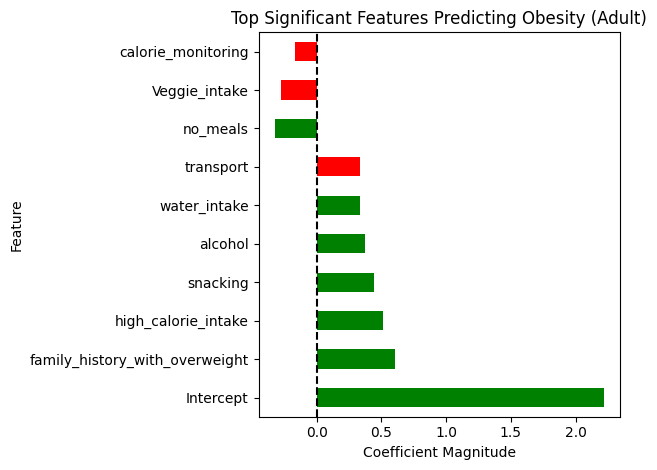

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare data (Adults & Seniors only)
X = adults_df.drop(columns=['obesity_level', 'age_class', 'age_group', 'Gender', 'Age', 'Height', 'Weight'])  # Drop specified columns
y = adults_df['obesity_level']  # Target (must be binary: 0/1 or 'non-obesity'/'obesity')

# 2. One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Check for constant columns
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
if constant_columns:
    print(f"Constant columns identified and will be dropped: {constant_columns}")
    X = X.drop(columns=constant_columns)

# 4. Check for NaN values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Data contains NaN values. Please handle them before proceeding.")
else:
    # 5. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Add intercept for statsmodels
    X_train_scaled = sm.add_constant(X_train_scaled)

    # 8. Fit logistic regression using statsmodels
    try:
        model = sm.Logit(y_train, X_train_scaled).fit(disp=0)  # disp=0 suppresses output during fitting
    except Exception as e:
        print(f"Error fitting model: {e}")
        raise

    # 9. Extract coefficients and p-values
    importance_df = pd.DataFrame({
        'Feature': ['Intercept'] + list(X.columns),  # Include intercept in features
        'Coefficient': model.params,
        'P-value': model.pvalues
    })

    # 10. Filter for significant features (p < 0.05)
    significant_features = importance_df[importance_df['P-value'] < 0.05].sort_values('P-value')

    print("Statistically Significant Features (p < 0.05):")
    print(significant_features)

    # 11. Visualize significant features
    if not significant_features.empty:
        plt.figure(figsize=(10, 6))
        significant_features.sort_values('Coefficient', key=abs, ascending=False).plot.barh(
            x='Feature', y='Coefficient',
            color=significant_features['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green'),
            legend=False
        )
        plt.axvline(0, color='black', linestyle='--')
        plt.xlabel('Coefficient Magnitude')
        plt.title('Top Significant Features Predicting Obesity (Adult)')
        plt.tight_layout()
        plt.show()
    else:
        print("No significant features (p < 0.05) found.")

In [ ]:
adults_df

,Gender,Age,Height,Weight,family_history_with_overweight,high_calorie_intake,Veggie_intake,no_meals,snacking,smoker,water_intake,calorie_monitoring,physical_activity,screen_time,alcohol,transport,obesity_level,age_group,age_class
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,0,1,0,Youth (15-24),Adults
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,1,0,Youth (15-24),Adults
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,1,0,Youth (15-24),Adults
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,2,1,Adults (25-64),Adults
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,1,1,Youth (15-24),Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,1,21.285965,1.726920,131.335786,1,1,3.0,3.0,2,0,1.796267,0,1.728332,0.897924,2,1,1,Youth (15-24),Adults
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,1,1,Youth (15-24),Adults
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,1,1,Youth (15-24),Adults
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,1,1,Adults (25-64),Adults


Statistically Significant Features (p < 0.05):
                            Feature  Coefficient       P-value
x1   family_history_with_overweight     1.677370  1.179043e-24
x12                       transport    -1.073092  3.626641e-10
x5                         snacking     0.709410  2.002478e-07
x8               calorie_monitoring     0.470362  4.434806e-04
x10                     screen_time    -0.341352  6.225193e-03
x4                         no_meals    -0.339874  2.028851e-02


<Figure size 1000x600 with 0 Axes>

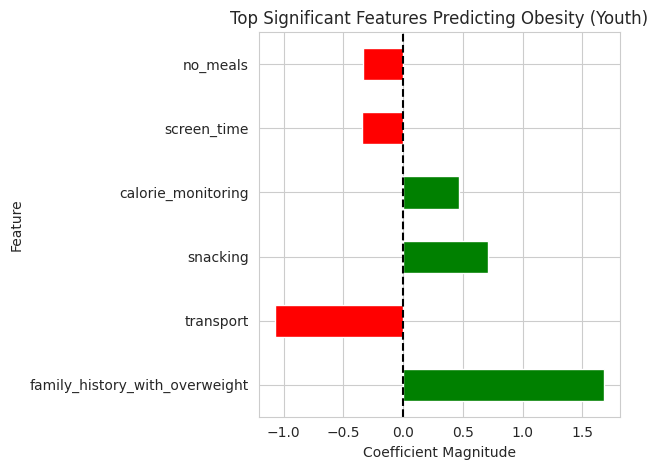

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare data (Adults & Seniors only)
X = df_under21.drop(columns=['obesity_level', 'age_class', 'age_group', 'Gender', 'Age', 'Height', 'Weight'])  # Drop specified columns
y = df_under21['obesity_level']  # Target (must be binary: 0/1 or 'non-obesity'/'obesity')

# 2. One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Check for constant columns
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
if constant_columns:
    print(f"Constant columns identified and will be dropped: {constant_columns}")
    X = X.drop(columns=constant_columns)

# 4. Check for NaN values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Data contains NaN values. Please handle them before proceeding.")
else:
    # 5. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Add intercept for statsmodels
    X_train_scaled = sm.add_constant(X_train_scaled)

    # 8. Fit logistic regression using statsmodels
    try:
        model = sm.Logit(y_train, X_train_scaled).fit(disp=0)  # disp=0 suppresses output during fitting
    except Exception as e:
        print(f"Error fitting model: {e}")
        raise

    # 9. Extract coefficients and p-values
    importance_df = pd.DataFrame({
        'Feature': ['Intercept'] + list(X.columns),  # Include intercept in features
        'Coefficient': model.params,
        'P-value': model.pvalues
    })

    # 10. Filter for significant features (p < 0.05)
    significant_features = importance_df[importance_df['P-value'] < 0.05].sort_values('P-value')

    print("Statistically Significant Features (p < 0.05):")
    print(significant_features)

    # 11. Visualize significant features
    if not significant_features.empty:
        plt.figure(figsize=(10, 6))
        significant_features.sort_values('Coefficient', key=abs, ascending=False).plot.barh(
            x='Feature', y='Coefficient',
            color=significant_features['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green'),
            legend=False
        )
        plt.axvline(0, color='black', linestyle='--')
        plt.xlabel('Coefficient Magnitude')
        plt.title('Top Significant Features Predicting Obesity (Youth)')
        plt.tight_layout()
        plt.show()
    else:
        print("No significant features (p < 0.05) found.")

Statistically Significant Features (p < 0.05):
                              Feature  Coefficient       P-value
const                       Intercept     2.204108  1.299683e-81
x1     family_history_with_overweight     0.558216  2.696484e-12
x2                high_calorie_intake     0.467152  9.748843e-10
x5                           snacking     0.485777  3.363102e-09
x7                       water_intake     0.429977  9.466029e-06
x11                           alcohol     0.338045  2.936006e-04
x4                           no_meals    -0.325225  8.566753e-04
x12                         transport     0.279869  9.815090e-03
x9                  physical_activity    -0.205630  3.481617e-02


<Figure size 1000x600 with 0 Axes>

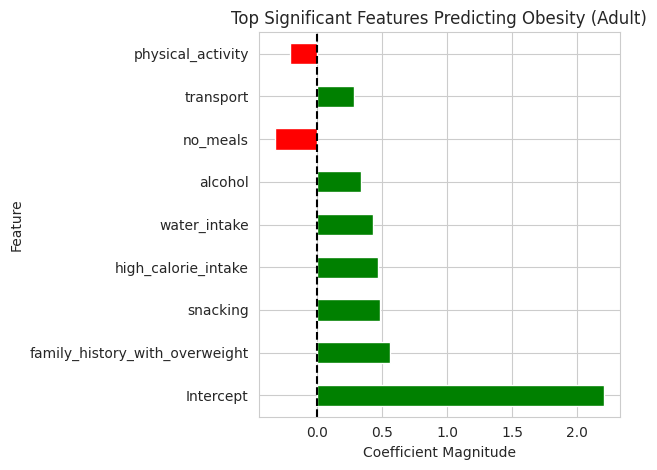

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Prepare data (Adults & Seniors only)
X = df_over21.drop(columns=['obesity_level', 'age_class', 'age_group', 'Gender', 'Age', 'Height', 'Weight'])  # Drop specified columns
y = df_over21['obesity_level']  # Target (must be binary: 0/1 or 'non-obesity'/'obesity')

# 2. One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# 3. Check for constant columns
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
if constant_columns:
    print(f"Constant columns identified and will be dropped: {constant_columns}")
    X = X.drop(columns=constant_columns)

# 4. Check for NaN values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Data contains NaN values. Please handle them before proceeding.")
else:
    # 5. Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 7. Add intercept for statsmodels
    X_train_scaled = sm.add_constant(X_train_scaled)

    # 8. Fit logistic regression using statsmodels
    try:
        model = sm.Logit(y_train, X_train_scaled).fit(disp=0)  # disp=0 suppresses output during fitting
    except Exception as e:
        print(f"Error fitting model: {e}")
        raise

    # 9. Extract coefficients and p-values
    importance_df = pd.DataFrame({
        'Feature': ['Intercept'] + list(X.columns),  # Include intercept in features
        'Coefficient': model.params,
        'P-value': model.pvalues
    })

    # 10. Filter for significant features (p < 0.05)
    significant_features = importance_df[importance_df['P-value'] < 0.05].sort_values('P-value')

    print("Statistically Significant Features (p < 0.05):")
    print(significant_features)

    # 11. Visualize significant features
    if not significant_features.empty:
        plt.figure(figsize=(10, 6))
        significant_features.sort_values('Coefficient', key=abs, ascending=False).plot.barh(
            x='Feature', y='Coefficient',
            color=significant_features['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green'),
            legend=False
        )
        plt.axvline(0, color='black', linestyle='--')
        plt.xlabel('Coefficient Magnitude')
        plt.title('Top Significant Features Predicting Obesity (Adult)')
        plt.tight_layout()
        plt.show()
    else:
        print("No significant features (p < 0.05) found.")